# 1. (25%)Nov. 12 資料科學應用案例演講 

## (a) (5%) 該演講對您來說印象深刻的主題為何？為什麼？請摘要此深刻的主題。其對您來說帶來的啟發為何？

讓我印象最深刻的主題就是公司在推動數位轉型的過程，在目前工業界正在從工業3.0進化到4.0，但將公司數位化並不是一件簡單的事，陳處長也有提到為了這個目標需要讓公司的員工去學習新技術，不過學習到的新技術並不能直接落地應用到真實情境，公司必需就自己的應用，去透過數位化來讓公司的生產力提升，而陳處長也提到友達光電花了6年的時間在為數位轉型打底，其實6年的時間就足以在學界發展出許多新技術，在業界卻只能邁出第一步，但這是不得不得改變，因此我認為能夠將自己的domain knowledge結合數位轉型會是公司相當需要的人才。

## (b) (5%) 該演講是否有翻轉/顛覆您對過去製造業的認知？如果有，什麼認知有了改變？如果無，什麼樣的認知跟您過去的既定印象一樣，是否有任何建議或可改善之處？

有，因為本身是機械系的學生，因此對設備方面比較熟悉，而一般在實驗室中的設備(例如工具機)其實使用的情況跟業界比較不同，都是有做實驗時才會去使用，但在公司中設備必須時時運轉，此時設備的保養就變成相當重要的課題，但在陳處長的介紹下才發現真正的設備保養是分為三種：計畫性保養、條件式保養、預測保養，這三種保養都相當重要的，除此之外為了要做到預測保養還需要將數據資訊化處理、故障預診模型、功能平台化，讓每位員工都能實現預測保養的能力，而這種保養的方式是我之前沒有碰過的，也經由陳處長的分享了解到設備保養是需要做到很確實的，確保機台不會打亂整個產線。

## (c) (5%) 該演講讓您瞭解到製造業應用數據科學方法的困難與挑戰在於何處？為什麼？ 如何建議或解決？ 

在收集數據方面是一個困難的項目，首先必須確保是從機台的關鍵元件擷取的資料，這樣收集到的資料才是有意義的，否則收集到的資料並無法反映機台的真實情況，但是機台其實是相當大的因此也不是件容易處理的事，再加上機台有些零件是會移動的更增添取得資料的難度。除此之外，sensor並非直接裝到機台上就可已使用的，陳處長也提到安裝sensor會遇到安裝脫落、位置不正確、規格不符等問題，而這些問題都必須要等到收集完數據後才會發現，因此如何收集到正確、有用的數據是有挑戰性的，但也因為sensor種類相當多，要相當了解各個sensor的運作原理才能減少整個作業流程。

## (d) (5%) 演講內容中，是否有任何疑點？或想問講者的問題為何？ 

在演講的過程中，陳處長有介紹並展示Doctor pi行動健檢機給我們看，在介紹的過程中有提到可以透過這台區收集到一些機台相關的數據並且能透過簡單的gui進行操作，但也提到健檢機是運用樹莓派所搭建的，不過樹莓派是給教育目的微型電腦，而在我們之前的使用經驗來看，樹莓派以工業的角度來看故障率是偏高的，而在當天demo時也發生一些小狀況，若要在業界使用是不是需要使用一些更穩定的單片機或是微型電腦？


## (e) (5%) 在演講內容中，是否有任何想給予建議的地方？例如問題切入點、問題本質、方法調整、驗證的省思等。 

在學校學習到許多數據處理的方法甚至是訓練ai模型，但想了解到更多在業界的運用的情況，或是哪些方法在業界實現是相當困難的？若有運用數據處理的方法，那帶給公司多少影響，例如良率提升多少、是否有幫助研發人員？我希望能在演講能聽到更多這類的資訊，畢竟課堂上教的終究是理論，能將理論應用到現實面才是困難的點，但這次陳處長的分享也讓我大開眼界了。


# 2. (40%) Decision Tree Algorithms

## Import packages

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

## (a) (5%) Construct a data science framework and show the data summary


### Data science framework



1.   查看資料的資訊(是否有遺漏值、資料的大小等等)
2.   檢查有無identical column、redundant column，剔除較無關的column(若有則將該column移除)
3.  檢查有無outlier或遺漏值(若有outlier則將該項資料轉成遺漏值，接著使用KNN一並填補這些遺漏值)



### Data summary

In [76]:
col_names = pd.read_excel("./MDS_Assignment3_Steelplates.xlsx", sheet_name="Var_Name", header=None)
df = pd.read_excel("./MDS_Assignment3_Steelplates.xlsx", sheet_name="Faults", header=None, names=col_names[0])
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [78]:
df.shape

(1941, 34)

In [79]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## (b) (5%) What is the problem about the dataset? Any identical column? Any redundant column? Any missing value? How to handle these issues?

### identical column

In [80]:
has_identical = False
for col in df:
    if len(pd.unique(df[col])) == 1:
        has_identical = True
        print(f'Column {col} is identical column')
if not has_identical:
    print('There is no identical column in this dataset.')

There is no identical column in this dataset.


### redundant column (drop掉相關係數>0.95的column)

In [81]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
redundant_column = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(redundant_column, axis=1)
redundant_column

['X_Maximum',
 'Y_Maximum',
 'X_Perimeter',
 'Sum_of_Luminosity',
 'TypeOfSteel_A400']

### outlier (使用標準化分數判斷，找出outlier後將值填為NA，再用遺漏值填補處理)

In [82]:
X = df.drop(["TypeOfSteel_A300", "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"], axis=1)
ss = StandardScaler()
scaled_df = ss.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns = X.columns)
abs_scaled_df = (abs(scaled_df)>3)
all_abs_scaled = abs_scaled_df.any(axis=1)
outlier_index = all_abs_scaled[all_abs_scaled==True]

In [83]:
X[abs_scaled_df==True] = float("nan")
X.head()

,X_Minimum,Y_Minimum,Pixels_Areas,Y_Perimeter,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,270900.0,267.0,44.0,76.0,108.0,1687,80.0,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,2538079.0,108.0,30.0,84.0,123.0,1687,80.0,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,1553913.0,71.0,19.0,99.0,125.0,1623,100.0,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,369370.0,176.0,45.0,99.0,126.0,1353,NaN,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,498078.0,2409.0,260.0,37.0,126.0,1353,185.0,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000


In [84]:
X[["TypeOfSteel_A300", "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]] = df[["TypeOfSteel_A300", "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]]
df_no_outlier = X
df_no_outlier.head()

,X_Minimum,Y_Minimum,Pixels_Areas,Y_Perimeter,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,TypeOfSteel_A300,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,270900.0,267.0,44.0,76.0,108.0,1687,80.0,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,1,0,0,0,0,0,0
1,645,2538079.0,108.0,30.0,84.0,123.0,1687,80.0,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,1,0,0,0,0,0,0
2,829,1553913.0,71.0,19.0,99.0,125.0,1623,100.0,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,1,0,0,0,0,0,0
3,853,369370.0,176.0,45.0,99.0,126.0,1353,NaN,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0,1,0,0,0,0,0,0
4,1289,498078.0,2409.0,260.0,37.0,126.0,1353,185.0,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0,1,0,0,0,0,0,0


### missing value (在(a)小題的df.info()可以看出原始資料並無遺漏值，因此這邊使用KNN填補的遺漏值就只剩outlier)

In [85]:
X = df.drop(["TypeOfSteel_A300", "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"],axis=1)
imputer = KNNImputer(n_neighbors=3)
df_fillk = imputer.fit_transform(X)
df_fillk = pd.DataFrame(df_fillk,columns=X.columns)
df_fillk.head()

,X_Minimum,Y_Minimum,Pixels_Areas,Y_Perimeter,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42.0,270900.0,267.0,44.0,76.0,108.0,1687.0,80.0,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645.0,2538079.0,108.0,30.0,84.0,123.0,1687.0,80.0,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829.0,1553913.0,71.0,19.0,99.0,125.0,1623.0,100.0,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853.0,369370.0,176.0,45.0,99.0,126.0,1353.0,290.0,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289.0,498078.0,2409.0,260.0,37.0,126.0,1353.0,185.0,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000


In [86]:
df_fillk[["TypeOfSteel_A300", "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]] = df[["TypeOfSteel_A300", "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]]

## (c) (5%) After data preprocessing, based on the prepared dataset, use the classification and regression tree (CART) to analyze the prepared dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

In [87]:
class_name = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains','Dirtiness', 'Bumps', 'Other_Faults']

def class_merge(x, var1, var2, var3, var4, var5, var6, var7, var8):

    if (x[var1]==1) :
        x[var8] = class_name[0]
    elif(x[var2]==1 ):
        x[var8] = class_name[1]
    elif(x[var3]==1 ):
        x[var8] = class_name[2]
    elif(x[var4]==1 ):
        x[var8] = class_name[3]
    elif(x[var5]==1 ):
        x[var8] = class_name[4]
    elif(x[var6]==1 ):
        x[var8] = class_name[5]
    elif(x[var7]==1 ):
        x[var8] = class_name[6]
        
    return x

new_df = df_fillk.apply(lambda x: class_merge(x, 'Pastry', 'Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults','Fault_class'), axis=1)
new_df.drop(['Pastry', 'Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'], axis=1 , inplace=True)

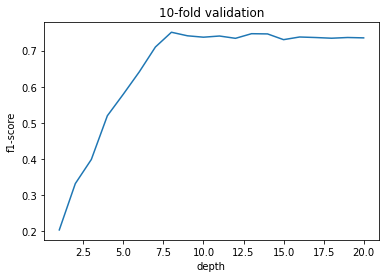

In [88]:
x, y = new_df.drop(['Fault_class'], axis=1), new_df[['Fault_class']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

score_list = []
depth = [i for i in range(1, 21)]

for i in depth:
    clf = DecisionTreeClassifier(criterion = "gini", max_depth = i, random_state=0)
    score = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1_macro')
    score_list.append(sum(score) / len(score))
    
plt.plot(depth, score_list)
plt.xlabel("depth")
plt.ylabel('f1-score')
plt.title("10-fold validation")
plt.show()

In [89]:
tmp = max(score_list)
score_list.index(tmp)

7

由上圖我們可以選擇 depth = 7 時結果最好，因此訓練上我們使用該參數

In [90]:
clf_cv = DecisionTreeClassifier(criterion = "gini", max_depth = 7, random_state=0)
clf_cv.fit(x_train, y_train)
y_pred = clf_cv.predict(x_test)

In [91]:
print("CART Accuracy score:", clf_cv.score(x_test, y_test))

CART Accuracy score: 0.7532133676092545


In [92]:
print("report:\n",classification_report(y_test, y_pred, target_names=["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"])) 

report:
               precision    recall  f1-score   support

      Pastry       0.60      0.71      0.65        72
   Z_Scratch       0.55      0.75      0.63         8
    K_Scatch       0.92      0.94      0.93        83
      Stains       0.73      0.71      0.72       143
   Dirtiness       0.44      0.24      0.31        29
       Bumps       1.00      0.92      0.96        13
Other_Faults       0.93      0.90      0.91        41

    accuracy                           0.75       389
   macro avg       0.74      0.74      0.73       389
weighted avg       0.75      0.75      0.75       389



In [93]:
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average=None)
for id, label in enumerate(pd.get_dummies(y_pred).columns):
    print(f'The AUC of {label}: {auc[id]}')

The AUC of Bumps: 0.8005389064143008
The AUC of Dirtiness: 0.8684383202099737
The AUC of K_Scatch: 0.9584416095755572
The AUC of Other_Faults: 0.779407584285633
The AUC of Pastry: 0.6081896551724139
The AUC of Stains: 0.9615384615384616
The AUC of Z_Scratch: 0.9469091673675357


## (d) (5%) Suggest a method to address the data imbalance issue. Build a new balanced dataset.

In [152]:
from collections import Counter
Counter(y_train['Fault_class'].tolist())

Counter({0: 330, 1: 47, 2: 308, 3: 530, 4: 129, 5: 59, 6: 149})

In [153]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
bal_x_train, bal_y_train = oversample.fit_resample(x_train, y_train)

Counter(bal_y_train['Fault_class'].tolist())

Counter({0: 530, 1: 530, 2: 530, 3: 530, 4: 530, 5: 530, 6: 530})

使用SMOTE(Synthetic Minority Oversampling Technique)將imbalance data變成balanced data，而SMOTE的演算法如下(截自網路)：

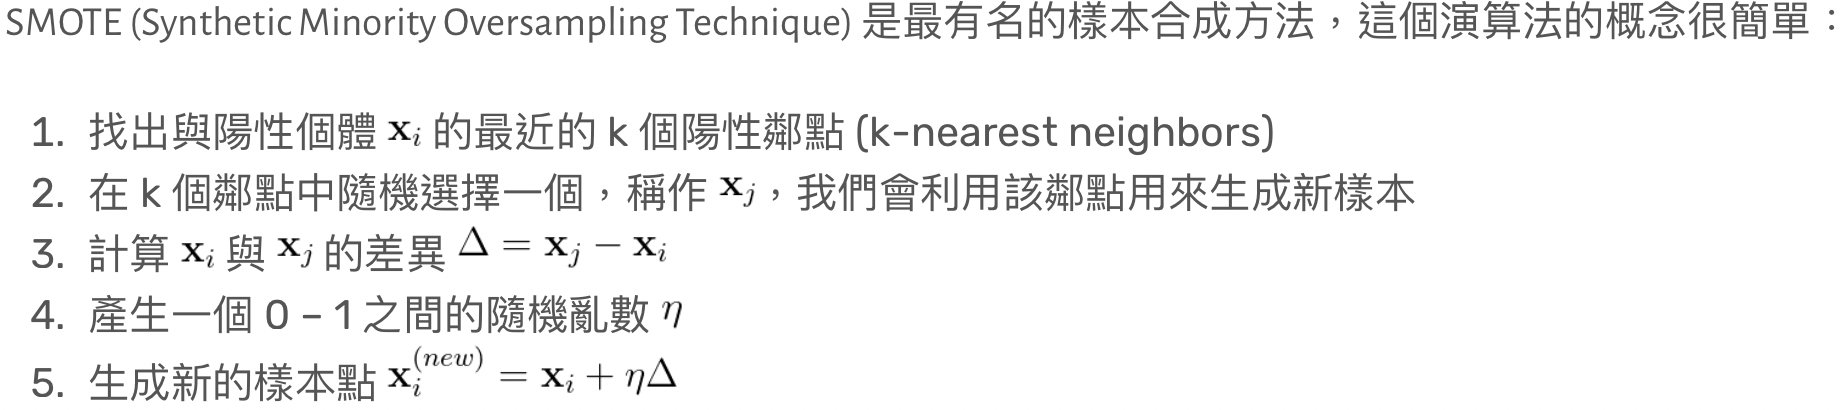

從上方的程式執行的結果可以看到經過SMOTE處理過後的資料已經變成balanced data

## (e) (5%) Based on the balanced dataset, use the classification and regression tree (CART) to analyze the balanced dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

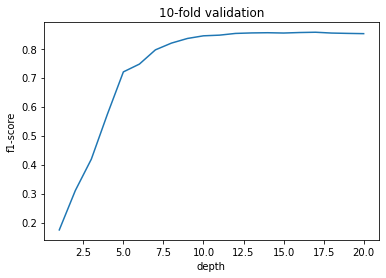

In [96]:
score_list = []
depth = [i for i in range(1, 21)]

for i in depth:
    clf = DecisionTreeClassifier(criterion = "gini", max_depth = i, random_state=0)
    score = cross_val_score(clf, bal_x_train, bal_y_train, cv=10, scoring='f1_macro')
    score_list.append(sum(score) / len(score))
    
plt.plot(depth, score_list)
plt.xlabel("depth")
plt.ylabel('f1-score')
plt.title("10-fold validation")
plt.show()

In [97]:
tmp = max(score_list)
score_list.index(tmp)

16

由上圖我們可以選擇 depth = 16 時結果最好，因此訓練上我們使用該參數

In [102]:
clf_cv = DecisionTreeClassifier(criterion = "gini", max_depth = 16, random_state=0)
clf_cv.fit(bal_x_train, bal_y_train)
y_pred = clf_cv.predict(x_test)

In [103]:
print("CART Accuracy score:", clf_cv.score(x_test, y_test))

CART Accuracy score: 0.7300771208226221


In [104]:
print("report:\n",classification_report(y_test, y_pred, target_names=["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"])) 

report:
               precision    recall  f1-score   support

      Pastry       0.57      0.72      0.63        72
   Z_Scratch       0.38      0.75      0.50         8
    K_Scatch       0.92      0.95      0.93        83
      Stains       0.78      0.59      0.67       143
   Dirtiness       0.43      0.41      0.42        29
       Bumps       0.86      0.92      0.89        13
Other_Faults       0.87      0.95      0.91        41

    accuracy                           0.73       389
   macro avg       0.68      0.76      0.71       389
weighted avg       0.75      0.73      0.73       389



In [105]:
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average=None)
for id, label in enumerate(pd.get_dummies(y_pred).columns):
    print(f'The AUC of {label}: {auc[id]}')

The AUC of Bumps: 0.7980196284612688
The AUC of Dirtiness: 0.8618766404199475
The AUC of K_Scatch: 0.9644657059610993
The AUC of Other_Faults: 0.7449258059014158
The AUC of Pastry: 0.6846743295019158
The AUC of Stains: 0.9588788870703764
The AUC of Z_Scratch: 0.9669890664423885


## (f) (5%) Give a comparison between (c) and (e). Any suggestion or insight?

將data轉換成balanced dataset之後，模型在testing data上全部的準確度會稍微下降，但去比較各個class的準確度會發現，在資料數量非常少的class，其準確度、f1-score、AUC都有機會提升一些，也就是不要讓模型overfit到資料量多的class。

## (g) (5%) Use “Random Forest” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight.

### prepared dataset

In [108]:
labelencoder = LabelEncoder()
y_train['Fault_class'] = labelencoder.fit_transform(y_train['Fault_class'])
y_test['Fault_class'] = labelencoder.fit_transform(y_test['Fault_class'])
bal_y_train['Fault_class'] = labelencoder.fit_transform(bal_y_train['Fault_class'])
y_train

,Fault_class
1917,3
808,5
680,2
534,2
192,6
...,...
1130,0
1294,3
860,1
1459,3


In [109]:
gridsearch = np.round(np.logspace(1,3.3,15),0)
gridsearch

array([  10.,   15.,   21.,   31.,   45.,   66.,   97.,  141.,  206.,
        301.,  439.,  641.,  936., 1367., 1995.])

In [110]:
c_list = []
train_f1 = []
val_f1 = []
for c in gridsearch:
    rfc = RandomForestClassifier(n_estimators=int(c),random_state=0,n_jobs=-1).fit(x_train, y_train)
    y_train_pred = rfc.predict(x_train)
    y_val_pred = rfc.predict(x_test)
    c_list.append(c)
    train_f1.append(mean_squared_error(y_train, y_train_pred))
    val_f1.append(mean_squared_error(y_test ,y_val_pred))
    print(c)

10.0
15.0
21.0
31.0
45.0
66.0
97.0
141.0
206.0
301.0
439.0
641.0
936.0
1367.0
1995.0


In [111]:
grid_df = pd.DataFrame(c_list,columns=["c"])
grid_df["train_mse"] = train_f1
grid_df["val_mse"] = val_f1
grid_df.sort_values(by="val_mse",ascending=True)

,c,train_mse,val_mse
7,141.0,0.000000,1.629820
11,641.0,0.000000,1.634961
14,1995.0,0.000000,1.637532
13,1367.0,0.000000,1.642674
8,206.0,0.000000,1.709512
4,45.0,0.000000,1.727506
12,936.0,0.000000,1.727506
3,31.0,0.000000,1.735219
6,97.0,0.000000,1.745501
9,301.0,0.000000,1.755784


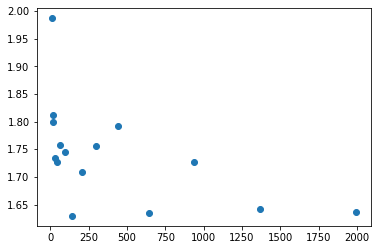

In [112]:
plt.scatter(grid_df["c"], grid_df["val_mse"])

In [113]:
len(x_train.columns)

22

In [114]:
gridsearch = [5,10,14,15,17,20,22]
c_list = []
train_f1 = []
val_f1 = []
for c in gridsearch:
    rfc = RandomForestClassifier(n_estimators=141,max_features=c,random_state=0,n_jobs=-1).fit(x_train, y_train)
    y_train_pred = rfc.predict(x_train)
    y_val_pred = rfc.predict(x_test)
    c_list.append(c)
    train_f1.append(mean_squared_error(y_train, y_train_pred))
    val_f1.append(mean_squared_error(y_test ,y_val_pred))
    print(c)

5
10
14
15
17
20
22


In [115]:
grid_df = pd.DataFrame(c_list,columns=["c"])
grid_df["train_mse"] = train_f1
grid_df["val_mse"] = val_f1
grid_df.sort_values(by="val_mse",ascending=True)

,c,train_mse,val_mse
3,15,0.0,1.447301
6,22,0.0,1.480720
1,10,0.0,1.555270
4,17,0.0,1.565553
5,20,0.0,1.568123
2,14,0.0,1.583548
0,5,0.0,1.688946


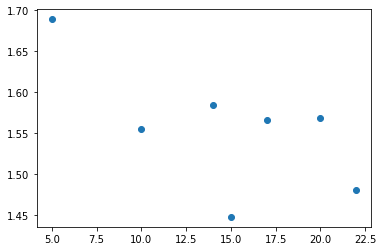

In [116]:
plt.scatter(grid_df["c"], grid_df["val_mse"])

從上方的程式輸出結果可以得知當n_estimators＝141、max_features=15，能夠得到較好的結果。

In [117]:
rf = RandomForestClassifier(n_estimators=141, max_features=15, n_jobs=-1, random_state=1)

rf.fit(x_train, y_train)

y_test_predict = rf.predict(x_test)
y_train_predict = rf.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
print("Accuracy score:", rf.score(x_test, y_test))

MSE training: 0.000, MSE testing: 1.609
RMSE training: 0.000, RMSE testing: 1.269
Accuracy score: 0.7917737789203085


In [118]:
print("report:\n",classification_report(y_test, y_test_predict, target_names=list(labelencoder.classes_))) 

report:
               precision    recall  f1-score   support

       Bumps       0.62      0.65      0.64        72
   Dirtiness       0.60      0.75      0.67         8
    K_Scatch       0.96      0.95      0.96        83
Other_Faults       0.76      0.77      0.77       143
      Pastry       0.59      0.55      0.57        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       1.00      0.93      0.96        41

    accuracy                           0.79       389
   macro avg       0.79      0.79      0.79       389
weighted avg       0.80      0.79      0.79       389



### balanced dataset

In [154]:
gridsearch = np.round(np.logspace(1,3.2,15),0)
gridsearch

array([  10.,   14.,   21.,   30.,   43.,   61.,   88.,  126.,  181.,
        260.,  373.,  535.,  769., 1104., 1585.])

In [155]:
c_list = []
train_f1 = []
val_f1 = []
for c in gridsearch:
    rfc = RandomForestClassifier(n_estimators=int(c),random_state=0,n_jobs=-1).fit(bal_x_train, bal_y_train)
    y_train_pred = rfc.predict(bal_x_train)
    y_val_pred = rfc.predict(x_test)
    c_list.append(c)
    train_f1.append(mean_squared_error(bal_y_train, y_train_pred))
    val_f1.append(mean_squared_error(y_test ,y_val_pred))
    print(c)

10.0
14.0
21.0
30.0
43.0
61.0
88.0
126.0
181.0
260.0
373.0
535.0
769.0
1104.0
1585.0


In [156]:
grid_df = pd.DataFrame(c_list,columns=["c"])
grid_df["train_mse"] = train_f1
grid_df["val_mse"] = val_f1
grid_df.sort_values(by="val_mse",ascending=True)

,c,train_mse,val_mse
13,1104.0,0.000000,1.766067
14,1585.0,0.000000,1.766067
9,260.0,0.000000,1.773779
4,43.0,0.000000,1.786632
12,769.0,0.000000,1.789203
10,373.0,0.000000,1.796915
11,535.0,0.000000,1.814910
5,61.0,0.000000,1.817481
6,88.0,0.000000,1.820051
0,10.0,0.025606,1.822622


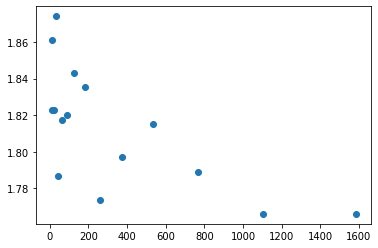

In [157]:
plt.scatter(grid_df["c"], grid_df["val_mse"])

In [123]:
len(bal_x_train.columns)

22

In [158]:
gridsearch = [5,10,15,18,19,20,21,22]
c_list = []
train_f1 = []
val_f1 = []
for c in gridsearch:
    rfc = RandomForestClassifier(n_estimators=1104,max_features=c,random_state=0,n_jobs=-1).fit(bal_x_train, bal_y_train)
    y_train_pred = rfc.predict(bal_x_train)
    y_val_pred = rfc.predict(x_test)
    c_list.append(c)
    train_f1.append(mean_squared_error(bal_y_train, y_train_pred))
    val_f1.append(mean_squared_error(y_test ,y_val_pred))
    print(c)

5
10
15
18
19
20
21
22


In [159]:
grid_df = pd.DataFrame(c_list,columns=["c"])
grid_df["train_mse"] = train_f1
grid_df["val_mse"] = val_f1
grid_df.sort_values(by="val_mse",ascending=True)

,c,train_mse,val_mse
7,22,0.0,1.634961
6,21,0.0,1.676093
5,20,0.0,1.717224
3,18,0.0,1.719794
1,10,0.0,1.745501
4,19,0.0,1.758355
2,15,0.0,1.766067
0,5,0.0,1.786632


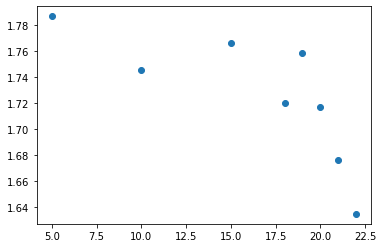

In [161]:
plt.scatter(grid_df["c"], grid_df["val_mse"])

從上方的程式輸出結果可以得知當n_estimators＝1104、max_features=22，能夠得到較好的結果。

In [162]:
rf = RandomForestClassifier(n_estimators=1104, n_jobs=-1, random_state=1, max_features=22)

rf.fit(bal_x_train, bal_y_train)

y_test_predict = rf.predict(x_test)
y_train_predict = rf.predict(bal_x_train)

train_mse = mean_squared_error(bal_y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
print("Accuracy score:", rf.score(x_test, y_test))

MSE training: 0.000, MSE testing: 1.681
RMSE training: 0.000, RMSE testing: 1.297
Accuracy score: 0.7686375321336761


In [163]:
print("report:\n",classification_report(y_test, y_test_predict, target_names=list(labelencoder.classes_))) 

report:
               precision    recall  f1-score   support

       Bumps       0.64      0.64      0.64        72
   Dirtiness       0.46      0.75      0.57         8
    K_Scatch       0.96      0.98      0.97        83
Other_Faults       0.77      0.67      0.72       143
      Pastry       0.46      0.66      0.54        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       0.93      0.95      0.94        41

    accuracy                           0.77       389
   macro avg       0.75      0.80      0.76       389
weighted avg       0.78      0.77      0.77       389



### Give a comparison and provide your insight

使用random forest的準確度會比使用CART更高，不論是在原始data或balanced data，因為random forest用了多棵的的decision tree去進行分類，但是在較少資料class的準確度並沒有因為balanced data而上升反而有下降的趨勢，猜測可能是random forest更能處理unbalanced data的問題。

## (h) (5%) Use “Gradient Boosting Decision Tree (GBDT)” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight.

### prepared dataset

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

In [165]:
gridsearch = np.round(np.logspace(1,3,20),0)
gridsearch

array([  10.,   13.,   16.,   21.,   26.,   34.,   43.,   55.,   70.,
         89.,  113.,  144.,  183.,  234.,  298.,  379.,  483.,  616.,
        785., 1000.])

In [166]:
c_list = []
train_f1 = []
val_f1 = []
for c in gridsearch:
    rfc = GradientBoostingClassifier(n_estimators=int(c),random_state=0).fit(x_train, y_train)
    y_train_pred = rfc.predict(x_train)
    y_val_pred = rfc.predict(x_test)
    c_list.append(c)
    train_f1.append(mean_squared_error(y_train, y_train_pred))
    val_f1.append(mean_squared_error(y_test ,y_val_pred))
    print(c)

10.0
13.0
16.0
21.0
26.0
34.0
43.0
55.0
70.0
89.0
113.0
144.0
183.0
234.0
298.0
379.0
483.0
616.0
785.0
1000.0


In [167]:
grid_df = pd.DataFrame(c_list,columns=["c"])
grid_df["train_mse"] = train_f1
grid_df["val_mse"] = val_f1
grid_df.sort_values(by="val_mse",ascending=True)

,c,train_mse,val_mse
13,234.0,0.000000,1.331620
11,144.0,0.069588,1.413882
12,183.0,0.040593,1.419023
14,298.0,0.000000,1.421594
16,483.0,0.000000,1.429306
15,379.0,0.000000,1.437018
19,1000.0,0.000000,1.452442
17,616.0,0.000000,1.473008
10,113.0,0.172036,1.475578
18,785.0,0.000000,1.498715


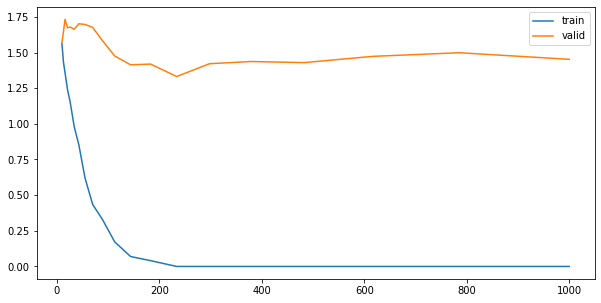

In [168]:
plt.figure(figsize=(10,5))
plt.plot(grid_df["c"], grid_df["train_mse"],label="train")
plt.plot(grid_df["c"], grid_df["val_mse"],label="valid")
plt.legend()

In [169]:
gridsearch = [5,10,12,15,19,20,22]
c_list = []
train_f1 = []
val_f1 = []
for c in gridsearch:
    rfc = GradientBoostingClassifier(n_estimators=234,max_features=c,random_state=0).fit(x_train, y_train)
    y_train_pred = rfc.predict(x_train)
    y_val_pred = rfc.predict(x_test)
    c_list.append(c)
    train_f1.append(mean_squared_error(y_train, y_train_pred))
    val_f1.append(mean_squared_error(y_test ,y_val_pred))
    print(c)

5
10
12
15
19
20
22


In [170]:
grid_df = pd.DataFrame(c_list,columns=["c"])
grid_df["train_mse"] = train_f1
grid_df["val_mse"] = val_f1
grid_df.sort_values(by="val_mse",ascending=True)

,c,train_mse,val_mse
6,22,0.000000,1.331620
4,19,0.000000,1.424165
5,20,0.000000,1.462725
2,12,0.005799,1.473008
1,10,0.005799,1.478149
3,15,0.005799,1.526992
0,5,0.005799,1.583548


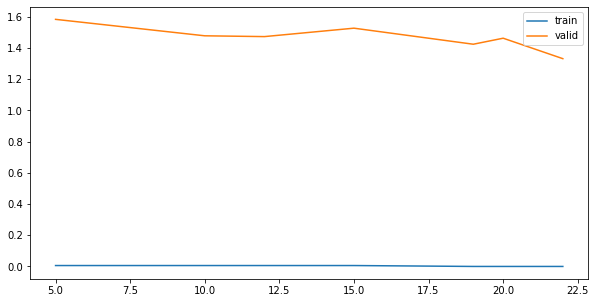

In [171]:
plt.figure(figsize=(10,5))
plt.plot(grid_df["c"], grid_df["train_mse"],label="train")
plt.plot(grid_df["c"], grid_df["val_mse"],label="valid")
plt.legend()

從上方的程式輸出結果可以得知當n_estimators＝234、max_features=22，能夠得到較好的結果。

In [174]:
gb = GradientBoostingClassifier(n_estimators=234,max_features=22,random_state=0)

gb.fit(x_train, y_train)

y_test_predict = gb.predict(x_test)
y_train_predict = gb.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
print("Accuracy score:", gb.score(x_test, y_test))

MSE training: 0.000, MSE testing: 1.332
RMSE training: 0.000, RMSE testing: 1.154
Accuracy score: 0.8097686375321337


In [173]:
print("report:\n",classification_report(y_test, y_test_predict, target_names=list(labelencoder.classes_))) 

report:
               precision    recall  f1-score   support

       Bumps       0.67      0.69      0.68        72
   Dirtiness       0.50      0.75      0.60         8
    K_Scatch       0.95      0.95      0.95        83
Other_Faults       0.77      0.78      0.77       143
      Pastry       0.74      0.59      0.65        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       1.00      0.98      0.99        41

    accuracy                           0.81       389
   macro avg       0.80      0.81      0.80       389
weighted avg       0.81      0.81      0.81       389



### balanced dataset

In [175]:
gridsearch = np.round(np.logspace(1,3,20),0)
gridsearch

array([  10.,   13.,   16.,   21.,   26.,   34.,   43.,   55.,   70.,
         89.,  113.,  144.,  183.,  234.,  298.,  379.,  483.,  616.,
        785., 1000.])

In [176]:
c_list = []
train_f1 = []
val_f1 = []
for c in gridsearch:
    rfc = GradientBoostingClassifier(n_estimators=int(c),random_state=0).fit(x_train, y_train)
    y_train_pred = rfc.predict(bal_x_train)
    y_val_pred = rfc.predict(x_test)
    c_list.append(c)
    train_f1.append(mean_squared_error(bal_y_train, y_train_pred))
    val_f1.append(mean_squared_error(y_test ,y_val_pred))
    print(c)

10.0
13.0
16.0
21.0
26.0
34.0
43.0
55.0
70.0
89.0
113.0
144.0
183.0
234.0
298.0
379.0
483.0
616.0
785.0
1000.0


In [177]:
grid_df = pd.DataFrame(c_list,columns=["c"])
grid_df["train_mse"] = train_f1
grid_df["val_mse"] = val_f1
grid_df.sort_values(by="val_mse",ascending=True)

,c,train_mse,val_mse
13,234.0,0.515094,1.331620
11,144.0,0.556873,1.413882
12,183.0,0.557412,1.419023
14,298.0,0.511321,1.421594
16,483.0,0.494340,1.429306
15,379.0,0.492453,1.437018
19,1000.0,0.484367,1.452442
17,616.0,0.505660,1.473008
10,113.0,0.612668,1.475578
18,785.0,0.489488,1.498715


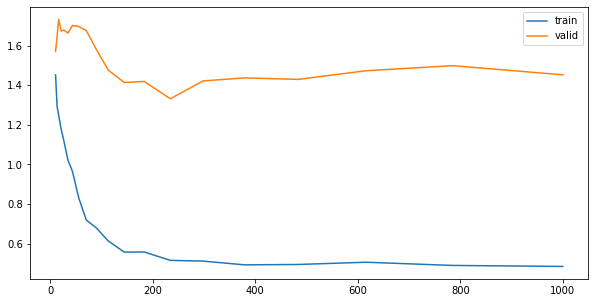

In [178]:
plt.figure(figsize=(10,5))
plt.plot(grid_df["c"], grid_df["train_mse"],label="train")
plt.plot(grid_df["c"], grid_df["val_mse"],label="valid")
plt.legend()

In [179]:
gridsearch = [5,10,15,19,20,22]
c_list = []
train_f1 = []
val_f1 = []
for c in gridsearch:
    rfc = GradientBoostingClassifier(n_estimators=234,max_features=c,random_state=0).fit(bal_x_train, bal_y_train)
    y_train_pred = rfc.predict(bal_x_train)
    y_val_pred = rfc.predict(x_test)
    c_list.append(c)
    train_f1.append(mean_squared_error(bal_y_train, y_train_pred))
    val_f1.append(mean_squared_error(y_test ,y_val_pred))
    print(c)

5
10
15
19
20
22


In [180]:
grid_df = pd.DataFrame(c_list,columns=["c"])
grid_df["train_mse"] = train_f1
grid_df["val_mse"] = val_f1
grid_df.sort_values(by="val_mse",ascending=True)

,c,train_mse,val_mse
3,19,0.018868,1.562982
5,22,0.014016,1.570694
2,15,0.012129,1.598972
1,10,0.026415,1.614396
4,20,0.014555,1.704370
0,5,0.036119,1.737789


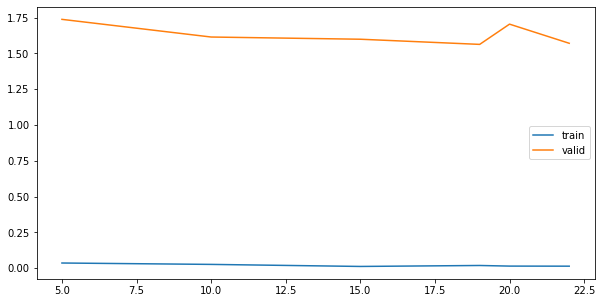

In [181]:
plt.figure(figsize=(10,5))
plt.plot(grid_df["c"], grid_df["train_mse"],label="train")
plt.plot(grid_df["c"], grid_df["val_mse"],label="valid")
plt.legend()

從上方的程式輸出結果可以得知當n_estimators＝234、max_features=19，能夠得到較好的結果。

In [183]:
gb = GradientBoostingClassifier(n_estimators=234,max_features=19,random_state=0)

gb.fit(bal_x_train, bal_y_train)

y_test_predict = gb.predict(x_test)
y_train_predict = gb.predict(bal_x_train)

train_mse = mean_squared_error(bal_y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
print("Accuracy score:", rf.score(x_test, y_test))

MSE training: 0.019, MSE testing: 1.563
RMSE training: 0.137, RMSE testing: 1.250
Accuracy score: 0.7686375321336761


In [184]:
print("report:\n",classification_report(y_test, y_test_predict, target_names=list(labelencoder.classes_))) 

report:
               precision    recall  f1-score   support

       Bumps       0.67      0.72      0.69        72
   Dirtiness       0.60      0.75      0.67         8
    K_Scatch       0.95      0.98      0.96        83
Other_Faults       0.83      0.76      0.80       143
      Pastry       0.70      0.66      0.68        29
      Stains       0.92      0.92      0.92        13
   Z_Scratch       0.89      0.98      0.93        41

    accuracy                           0.82       389
   macro avg       0.80      0.82      0.81       389
weighted avg       0.82      0.82      0.82       389



### Give a comparison and provide your insight

GDPT的預測結果又比random forest來得更好，但較少原始資料的class在balanced data中，有些預測結果的準確度、f1-score有比用原始資料預測的結果來得高，沒有random forest降低的問題。

# 3. (20%) Deep Learning

## (a) (20%) For CNN, try to investigate the effects of changing “PARAMETERS” such as learning rates, momentum, # of hidden/convolutional layers, dropout rate, etc. Show the numerical results and “DIAGRAM” from different perspectives (e.g., accuracy, F1-score, convergence time, error of training data, error of testing data, etc.). Please show all your work in detail, in particular, you “MAY” need to design your experiments with different parameters systematically.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### hyperparameters

In [ ]:
batch_size = 32
lr = 0.001
epochs = 15

### Read and preprocess the data

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_gen = ImageDataGenerator(rescale=1./255)

img_size = (300, 300)
random_seed = 306

train_path = './archive/casting_data/casting_data/train/'
test_path = './archive/casting_data/casting_data/test/'

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'classes': {'ok_front': 0,
                         'def_front': 1},
             'class_mode': 'binary',
             'batch_size': batch_size,
             'seed': random_seed}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'classes': {'ok_front': 0,
                        'def_front': 1},
            'class_mode': 'binary',
            'batch_size': batch_size,
            'seed': random_seed,
            'shuffle': False}

train_set = train_gen.flow_from_directory(directory=train_path, subset='training', **arg_train)
valid_set = train_gen.flow_from_directory(directory=train_path, subset='validation', **arg_train)
test_set = test_gen.flow_from_directory(directory=test_path, **arg_test)

Found 5971 images belonging to 2 classes.
Found 662 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


### Model

In [ ]:
model = Sequential()

model.add(Conv2D(20, (5,5),padding="same",
                 input_shape=img_size + (1,),
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(50, (5,5), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 300, 300, 20)      520       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 150, 150, 20)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 50)      25050     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 50)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 281250)            0         
                                                                 
 dense_8 (Dense)             (None, 500)              

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=lr), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Training

In [ ]:
model.fit(
    train_set,
    validation_data=valid_set,
    epochs=epochs,
    callbacks=ModelCheckpoint(
        'best_model.hdf5',
        save_best_only=True,
        monitor='val_loss')
    )

Epoch 1/15
187/187 [==============================] - 24s 123ms/step - loss: 0.9077 - accuracy: 0.7113 - val_loss: 0.3813 - val_accuracy: 0.8263
Epoch 2/15
187/187 [==============================] - 23s 122ms/step - loss: 0.3014 - accuracy: 0.8694 - val_loss: 0.2352 - val_accuracy: 0.8973
Epoch 3/15
187/187 [==============================] - 16s 88ms/step - loss: 0.1903 - accuracy: 0.9256 - val_loss: 0.5660 - val_accuracy: 0.7508
Epoch 4/15
187/187 [==============================] - 23s 123ms/step - loss: 0.1168 - accuracy: 0.9598 - val_loss: 0.1273 - val_accuracy: 0.9562
Epoch 5/15
187/187 [==============================] - 23s 123ms/step - loss: 0.0587 - accuracy: 0.9811 - val_loss: 0.0719 - val_accuracy: 0.9773
Epoch 6/15
187/187 [==============================] - 17s 89ms/step - loss: 0.2543 - accuracy: 0.9009 - val_loss: 0.2038 - val_accuracy: 0.9184
Epoch 7/15
187/187 [==============================] - 16s 87ms/step - loss: 0.1128 - accuracy: 0.9561 - val_loss: 0.0861 - val_accur

### History

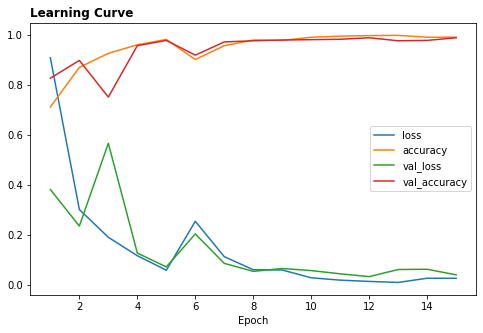

In [ ]:
histo_dict = model.history.history
histo_df = pd.DataFrame(histo_dict, index=range(1,epochs+1))
fig, ax = plt.subplots(figsize=(8,5))
for m in histo_df.columns:
    ax.plot(histo_df.index, m, data=histo_df)
ax.set_xlabel('Epoch')
ax.set_title('Learning Curve', loc='left', weight='bold')
ax.legend()
plt.show()

### Testing

In [ ]:
best_model = load_model('./best_model.hdf5')

pred_prob = best_model.predict(test_set)
pred = (pred_prob >= 0.5).reshape(-1,)
ground_truth = test_set.classes[test_set.index_array]

### Performance

In [ ]:
print(f'Accuracy: {accuracy_score(pred, ground_truth)}')

Accuracy: 0.9972027972027973


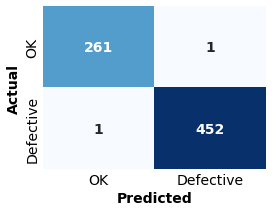

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
ax = sns.heatmap(confusion_matrix(ground_truth, pred), annot=True,
                 annot_kws={'size':14, 'weight':'bold'},
                 fmt='d', cbar=False, cmap='Blues')
ax.set_xticklabels(['OK', 'Defective'])
ax.set_yticklabels(['OK', 'Defective'], va='center')
plt.tick_params(axis='both', labelsize=14, length=0)
plt.ylabel('Actual', size=14, weight='bold')
plt.xlabel('Predicted', size=14, weight='bold')
plt.show()

In [ ]:
print(classification_report(ground_truth, pred, digits=4))

              precision    recall  f1-score   support

           0     0.9962    0.9962    0.9962       262
           1     0.9978    0.9978    0.9978       453

    accuracy                         0.9972       715
   macro avg     0.9970    0.9970    0.9970       715
weighted avg     0.9972    0.9972    0.9972       715



### 參數調整過程



1.   Testing accuracy: 0.634

     batch size = 64; learning rate = 0.007; epochs = 20

     起初的模型是使用LeNet(助教github上提供的模型)，發現在訓練時training accuracy都不會變動，只有loss下降而已，因此需要調整model架構。

     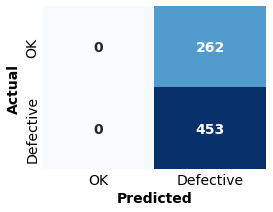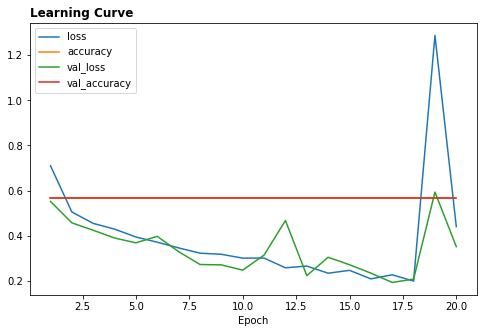
2.   Testing accuracy: 0.975

     batch size = 64; learning rate = 0.007; epochs = 20

     將model中的activation function從tanh改成relu(增加模型的非線性)、softmax改成sigmoid(避免兩個class預測的機率太相近)，更改之後會發現training accuracy有持續上升、loss持續下降。

     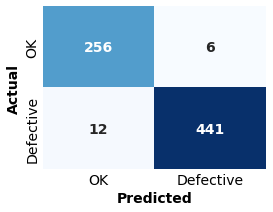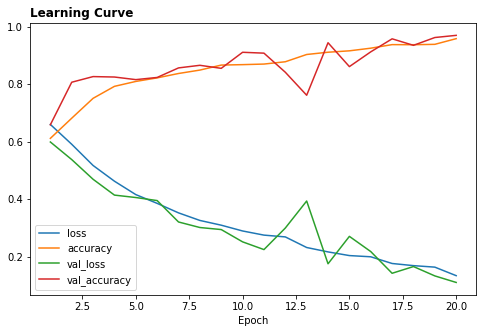
3.   Testing accuracy: 0.985

     batch size = 64; learning rate = 0.001; epochs = 20

     前一個model得到不錯的accuracy，因此可以在learning rate及optimizer做更動，將learning rate調小至調小至0.001、將optimizer從SGD更換成效果更好的Adam，而結果也有發現更好一點，但也發現最後一個epoch有overfitting的現象。

     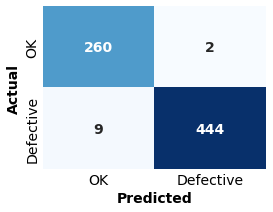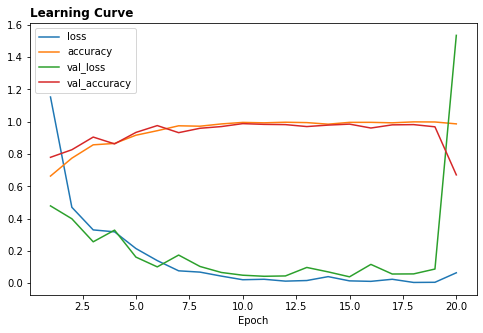
4.   Testing accuracy: 0.997

     batch size = 32; learning rate = 0.001; epochs = 15

     前一個model已經得到很高的accuracy，我想看能不能透過更改batch size讓model收斂更快更好，因此我將batch size調小成32，較小的batch size代表在訓練時隨機性更高，更有機會繞過loss function的saddle point、local minima，並且會得到較快的速度，另外發現model大概15個epoch就有不錯的表現，所以將epochs調成15就好。

     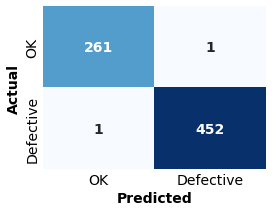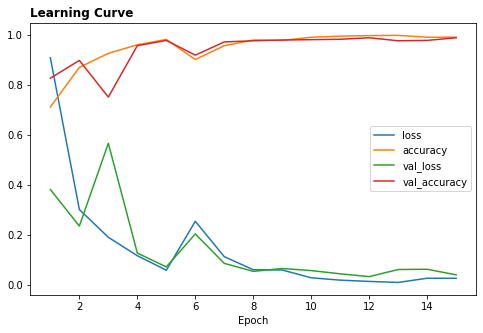


#  4. (15%) Time-Series Prediction

資料來源：https://fred.stlouisfed.org/series/DGASNYH

In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

TensorFlow 1.x selected.


'1.15.2'

### (a) (10%) Prepare and transform the data to appropriate format (eg. use Data Generator in https://www.datacamp.com/community/tutorials/lstm-python-stock-market). Build LSTM model and show the prediction results via Time-series Nested Cross Validation.

### Read and preprocess the data

In [ ]:
df = pd.read_csv("./DGASNYH.csv")
df = df.sort_values('DATE')
df = df.replace('.', np.nan)
df.head()

,DATE,DGASNYH
0,2000-01-04,0.658
1,2000-01-05,0.649
2,2000-01-06,0.659
3,2000-01-07,0.640
4,2000-01-10,0.646


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5498 entries, 0 to 5714
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     5498 non-null   object
 1   DGASNYH  5498 non-null   object
dtypes: object(2)
memory usage: 128.9+ KB


In [ ]:
y = df['DGASNYH'].to_numpy().astype(float)
y

array([0.658, 0.649, 0.659, ..., 2.414, 2.385, 2.13 ])

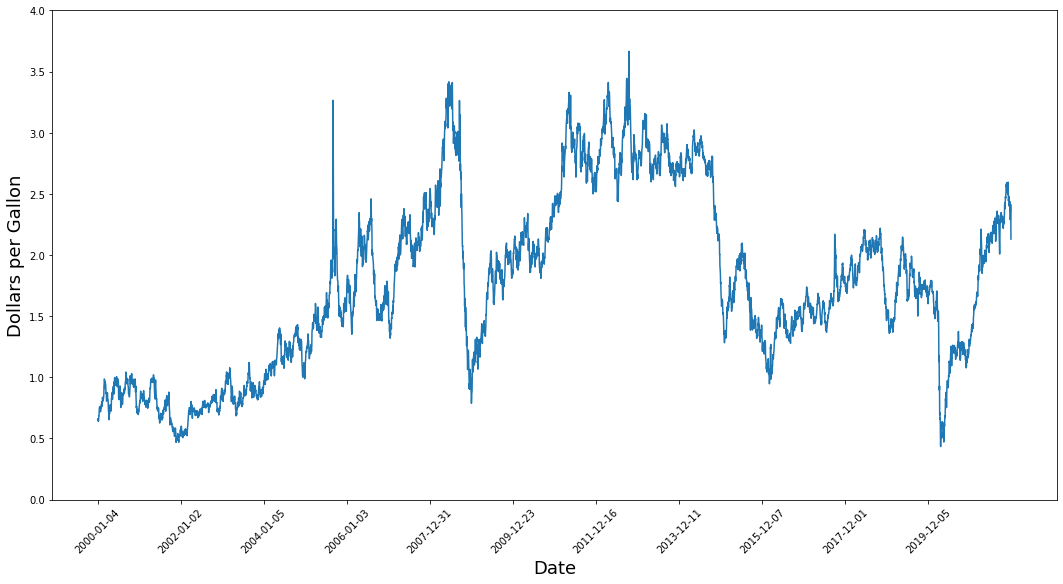

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),y)
plt.xticks(range(0,df.shape[0],500),df['DATE'].loc[::500],rotation=45)
plt.yticks(np.arange(0,max(y)+0.5,0.5))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Dollars per Gallon',fontsize=18)
plt.show()

### Splitting Data into a Training set and a Test set

In [ ]:
train_data = y[:4500]
test_data = y[4500:]

### Normalizing the Data

In [ ]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

smoothing_window_size = 1125
for di in range(0,4500,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

train_data = train_data.reshape(-1)
test_data = scaler.transform(test_data).reshape(-1)

In [ ]:
EMA = 0.0
gamma = 0.1
for ti in range(4500):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

all_mid_data = np.concatenate([train_data,test_data],axis=0)

### Data Generator

In [ ]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat)
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.02029915 0.45373383 0.39448562 0.4255759  0.9196293 ]

	Output: [0.07949979 0.47895363 0.39448562 0.4417399  0.916372  ]


Unrolled index 1
	Inputs:  [0.03760684 0.4614587  0.39628518 0.43089366 0.91915274]

	Output: [0.05425214 0.47895363 0.40783063 0.43656492 0.9084524 ]


Unrolled index 2
	Inputs:  [0.05425214 0.46734276 0.4000737  0.43656492 0.916372  ]

	Output: [0.09163528 0.46734276 0.40783063 0.45304006 0.9084524 ]


Unrolled index 3
	Inputs:  [0.06720299 0.47210422 0.40553817 0.4417399  0.9125523 ]

	Output: [0.10576235 0.5086796  0.41390747 0.4452642  0.9125523 ]


Unrolled index 4
	Inputs:  [0.07949979 0.47895363 0.40783063 0.4452642  0.9111371 ]

	Output: [0.13365896 0.51689285 0.41390747 0.4452642  0.90412956]


### Hyperparameters

In [ ]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 30 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [250,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

### Inputs and Outputs

In [ ]:
train_inputs, train_outputs = [],[]

for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

### Model

In [ ]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


In [ ]:
# Create cell state and hidden state variables to maintain the state of the LSTM
c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Loss Calculation and Optimizer

In [ ]:
print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
	All done


### Prediction Related Calculations

In [ ]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


### Running the LSTM

In [ ]:
epochs = 50
valid_summary = 1 # Interval you make test predictions

n_predict_once = 30 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(4500,5468,30).tolist()

for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 2.054090


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


	Test MSE: 0.02039
	Finished Predictions
Average loss at step 2: 0.376508
	Test MSE: 0.02780
	Finished Predictions
Average loss at step 3: 0.214903
	Test MSE: 0.00879
	Finished Predictions
Average loss at step 4: 0.142171
	Test MSE: 0.01231
	Finished Predictions
Average loss at step 5: 0.107561
	Test MSE: 0.00678
	Finished Predictions
Average loss at step 6: 0.086522
	Test MSE: 0.00675
	Finished Predictions
Average loss at step 7: 0.071770
	Test MSE: 0.00563
	Finished Predictions
Average loss at step 8: 0.065603
	Test MSE: 0.00533
	Finished Predictions
Average loss at step 9: 0.058002
	Test MSE: 0.00514
	Finished Predictions
Average loss at step 10: 0.057211
	Test MSE: 0.00477
	Finished Predictions
Average loss at step 11: 0.056699
	Test MSE: 0.00508
	Finished Predictions
Average loss at step 12: 0.055725
	Test MSE: 0.00463
	Finished Predictions
Average loss at step 13: 0.049441
	Test MSE: 0.00450
	Finished Predictions
Average loss at step 14: 0.048574
	Test MSE: 0.00436
	Finished Pred

## (b) (5%) Visualize the time-rolling prediction as above diagram.

### Visualizing the Predictions

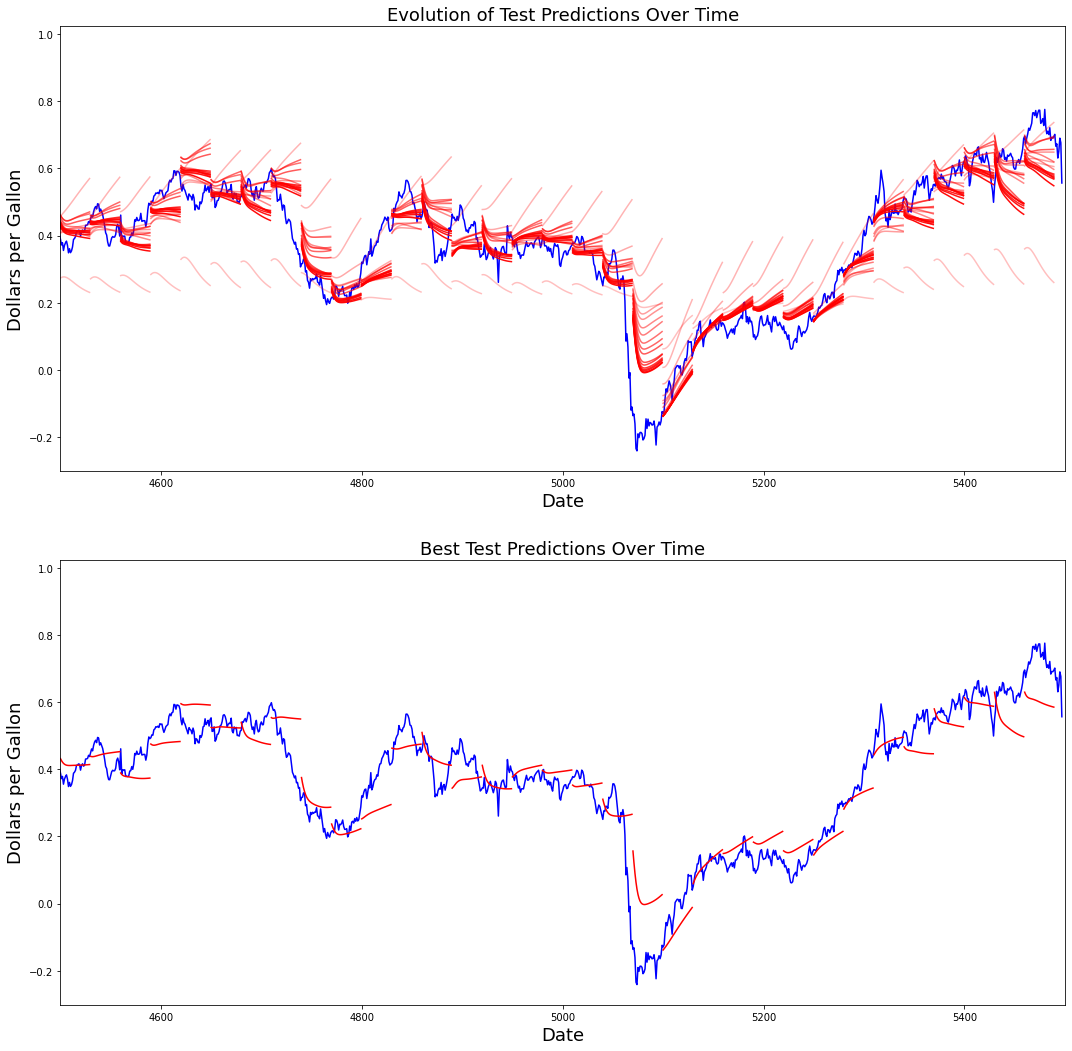

In [ ]:
best_prediction_epoch = 43 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Dollars per Gallon',fontsize=18)
plt.xlim(4500,5500)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Dollars per Gallon',fontsize=18)
plt.xlim(4500,5500)
plt.show()

# References



1.   https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
2.   https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
3.   https://taweihuang.hpd.io/2018/12/30/imbalanced-data-sampling-techniques/
4.  https://www.kaggle.com/ginsaputra/visual-inspection-of-casting-products-using-cnn
5.  https://fred.stlouisfed.org/series/DGASNYH
6.  https://github.com/PO-LAB/Manufacturing-Data-Science
